### Physics 453: Simple Harmonic Oscillator

The Simple Harmonic Oscillator (SHO) is one of the most important problems in physics.  This is because it comes up in a surprising number of contexts, from playgrounds to quantum field theory.  Luckily, it also happens to be one of the problems we can solver analytically!

In this assignment, we will:
1. Animate superpositions of SHO states
* Explore how to find the SHO solutions numerically
* Investigate coherent states of the SHO

The first item is just what we did for the infinite square well.  The second item opens up a whole new world - although we can solve the SHO exactly, the ability to solve the Schrodinger equation will allow us to explore the vast universe of problems we can't solve analytically.

### SHO Energy Eigenstates
The wavefunctions and energies for the SHO energy eigenstates are
$$\psi_n(x) = \frac{1}{\sqrt{2^nn!}}\left( \frac{m\omega}{\pi \hbar} \right)^{1/4}e^{-\frac{m\omega x^2}{2\hbar}}H_n\left(\sqrt{ \frac{m \omega}{\hbar}}x \right)$$
$$E_n=\hbar \omega \left( n+\frac{1}{2}\right) $$

In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm
import math

m=1
w=1
hbar=1

dx = 0.1
x_max = 10
x = numpy.arange(-x_max,x_max,dx)

def norm(dx, f):
    return numpy.dot(numpy.conjugate(f), f)*dx

def energy_n(n):
    return hbar*w*(n+0.5)

def psi_n_x(n, x):
    herm_arg = numpy.sqrt(m*w/hbar)*x
    herm_coeffs = numpy.zeros(n+1)
    herm_coeffs[n] = 1
    prefactor = 1./numpy.sqrt(2.**n * math.factorial(n)) * (m*w/(numpy.pi*hbar))**(0.25)
    psi = prefactor * numpy.exp(- herm_arg**2 / 2) * Herm.hermval(herm_arg, herm_coeffs)
    return psi

def psi_n_x_t(n, x, t):
    return psi_n_x(n, x)*numpy.exp(-1j * energy_n(n) * t / hbar)

def wavefunction(cn, x, t):
    
    # First we check that the coefficients obey the rule that total probability = 1
    total_probability = numpy.dot(numpy.conjugate(cn),cn)
    if(not abs(total_probability - 1) < 1e-6):    
        print("Error! Sum of the conefficients squared does not equal 1! Total Probability =", total_probability)
        return
    
    # Now we create a blank wavefunction.  We will add each eigenstate to it, weighted by the proper coefficients.
    wf = numpy.zeros_like(x)
    for n in range(0,len(cn)):
        wf = wf + cn[n]*psi_n_x_t(n, x, t)   # This is the line you need to fix!
        
    return wf

Norm =  1.0


<IPython.core.display.Javascript object>


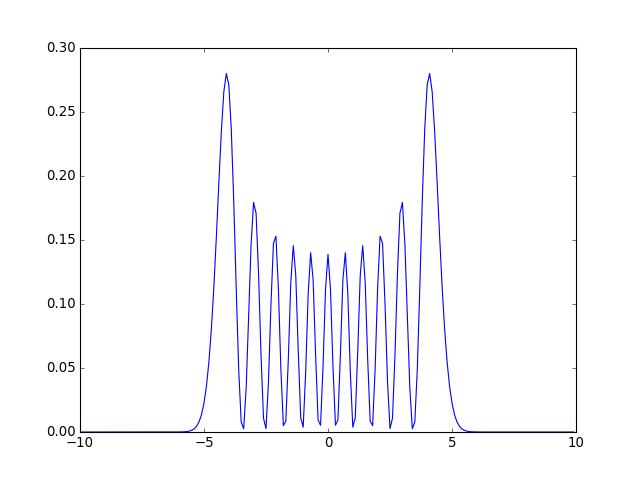

In [2]:

n=10
psi = psi_n_x(n,x)
prob = numpy.conjugate(psi)*psi
print("Norm = ", dx*numpy.sum(prob))
plt.plot(x, prob)
plt.show()

### Time Evolution of Superposition States
Right now the coefficients are set to approximate a coherent state.

In [5]:
cn=numpy.array([numpy.sqrt(1./4), numpy.sqrt(1./4),0,numpy.sqrt(1./4),0, numpy.sqrt(1./4),0])
cn = numpy.array([1,1,0,1,0,0,1])
cn = cn / numpy.sqrt(numpy.dot(numpy.conjugate(cn), cn))

alpha = 3
n_max = 20
ns = range(0, n_max)
cn = numpy.zeros(n_max)
for n in list(ns):
    cn[n] = alpha**n / numpy.sqrt(math.factorial(n))
    
cn = cn / numpy.sqrt(numpy.dot(numpy.conjugate(cn), cn))

<IPython.core.display.Javascript object>


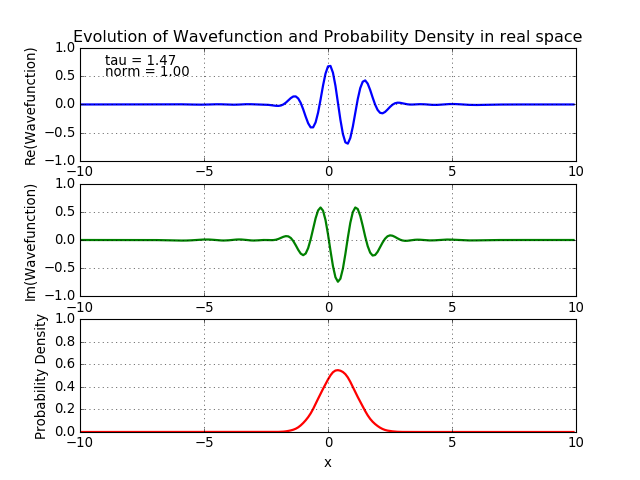

In [6]:
import matplotlib.animation as animation
  
# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3,1)

# intialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='g')
line3, = ax3.plot([], [], lw=2, color='r')
line = [line1, line2, line3]

# the same axes initalizations as before (just now we do it for both of them)
ax1.set_ylim(-1,1)
ax1.set_xlim(-x_max, x_max)
ax1.grid()
ax1.set_ylabel("Re(Wavefunction)")
ax1.set_title("Evolution of Wavefunction and Probability Density in real space")

ax2.set_ylim(-1, 1)
ax2.set_xlim(-x_max, x_max)
ax2.grid()
ax2.set_ylabel("Im(Wavefunction)")

ax3.set_ylim(0, 1)
ax3.set_xlim(-x_max, x_max)
ax3.grid()
ax3.set_xlabel("x")
ax3.set_ylabel("Probability Density")

time_text = ax1.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
norm_text = ax1.text(0.05, 0.85,'',horizontalalignment='left',verticalalignment='top', transform=ax1.transAxes)
time_per_frame = 0.01     # You could change this to make the animation faster or slower

def run_init():
    line[0].set_data([], [])
    line[1].set_data([], [])
    line[2].set_data([], [])
    return line,
    
def run(i):
    wf = wavefunction(cn, x, time_per_frame*i)
    y1data = numpy.real(wf)
    y2data = numpy.imag(wf)
    y3data = numpy.conjugate(wf)*wf

    # update the data of the three line objects
    line[0].set_data(x, y1data)
    line[1].set_data(x, y2data)
    line[2].set_data(x, y3data)
    #Display the current animation time
    time_text.set_text('tau = %.2f' % (i*time_per_frame))
    norm_text.set_text('norm = %.2f' % (norm(dx,wf)))
    return line, time_text, norm_text

ani = animation.FuncAnimation(fig, run, init_func=run_init,
                               frames=1000, interval=20, blit=True)
    
plt.show()